# Plots for paper

In [1]:
%load_ext autoreload
%autoreload 2

In [5]:
import sys
import json 
import pandas as pd 
try:
    sys.path.remove("../py_src") # Hacky way to add higher directory to python modules path. 
except:
    pass
sys.path.append("../py_src") # Means that I dont have to make src/ a proper python package

In [6]:
from plotting import plot_custom_corner

In [7]:
def plot_all_corners(path,seed,save_id):


    #default values of GW parameters
    ranges=[(4e-7,6e-7),(-np.pi,np.pi),(0.0+1.0,np.pi+1.0),(0.0,np.pi/2.0),(-np.pi/2 + 0.8,np.pi/2 + 0.8),(0.0,np.pi),(0.5e-12,1.5e-12)]
    injection_parameters = [5e-7,0.20,2.50,1.0,1.0,1.0,1e-12]
    labels = [r'$\omega$',r'$\Phi_0$',r'$\psi$',r'$\iota$', r'$\delta$',r'$\alpha$',r'h']
    variables_to_plot = ["omega_gw","phi0_gw","psi_gw","iota_gw","delta_gw","alpha_gw", "h"]
    axes_scales = None

    #Corner plot of GW parameters
    plot_custom_corner(path,variables_to_plot,labels,injection_parameters,ranges,axes_scales,savefig=f'{save_id}_GW')




    #Plot f0 
    pulsars = pd.read_csv("../data/NANOGrav_pulsars.csv")
    true_f = pulsars["F0"].to_numpy()


    labels = [r'$f_0$',r'$f_1$',r'$f_2$',r'$f_3$', r'$f_4$']
    idx = len(labels)
    injection_parameters = true_f[0:idx]
    variables_to_plot = ["f00", "f01", "f02", "f03", "f04"]

#    ranges = [(i*0.9,i*1.1) for i in injection_parameters]


    tol = 0.1
    ranges = [(i-np.abs(i*tol),i+np.abs(i*tol)) for i in injection_parameters]


    axes_scales = None
    plot_custom_corner(path,variables_to_plot,labels,injection_parameters,ranges,axes_scales,savefig=f'{save_id}_f' )


    #Plot f1
    true_f = pulsars["F1"].to_numpy()

    labels = [r'$\dot{f}_0$',r'$\dot{f}_1$',r'$\dot{f}_2$',r'$\dot{f}_3$', r'$\dot{f}_4$']
    idx = len(labels)
    injection_parameters = true_f[0:idx]
    variables_to_plot = ["fdot0", "fdot1", "fdot2", "fdot3", "fdot4"]

    tol = 0.1
    ranges = [(i-np.abs(i*tol),i+np.abs(i*tol)) for i in injection_parameters]
    axes_scales = None
    plot_custom_corner(path,variables_to_plot,labels,injection_parameters,ranges,axes_scales,savefig=f'{save_id}_fdot')


    #Plot sigma_p, log scaled
    generator = np.random.default_rng(seed)
    σp = generator.uniform(low = 1e-21,high=1e-19,size=len(true_f))

        
    labels = [r'$\sigma_p^0$',r'$\sigma_p^1$',r'$\sigma_p^2$',r'$\sigma_p^3$', r'$\sigma_p^4$']
    idx = len(labels)
    injection_parameters = σp[0:idx]
    variables_to_plot    = ["sigma_p0", "sigma_p1", "sigma_p2", "sigma_p3", "sigma_p4"]
    ranges = [(1e-22,1e-18) for i in injection_parameters]




    plot_custom_corner(path,variables_to_plot,labels,injection_parameters,ranges,axes_scales,savefig=f'{save_id}_sigma_p',logscale=True)




## Example 1: Run ID 1237, $h = 10^{-12}$

The evidence is: 132032.6085980951
Number of samples:
2150
Truths/Medians/Variances
$\omega$ 5e-07 5.000164895692345e-07 6.576856477971016e-29
$\Phi_0$ 0.2 0.4117360377345518 1.5032131021193802e-07
$\psi$ 2.5 2.558517120394039 6.887903118167497e-08
$\iota$ 1.0 0.3348702783904385 7.476260221790911e-05
$\delta$ 1.0 1.0123061724508975 3.2545382822992254e-16
$\alpha$ 1.0 1.0557003990514846 1.4470317489223135e-15
h 1e-12 6.616974242118738e-13 3.9910860748216704e-30


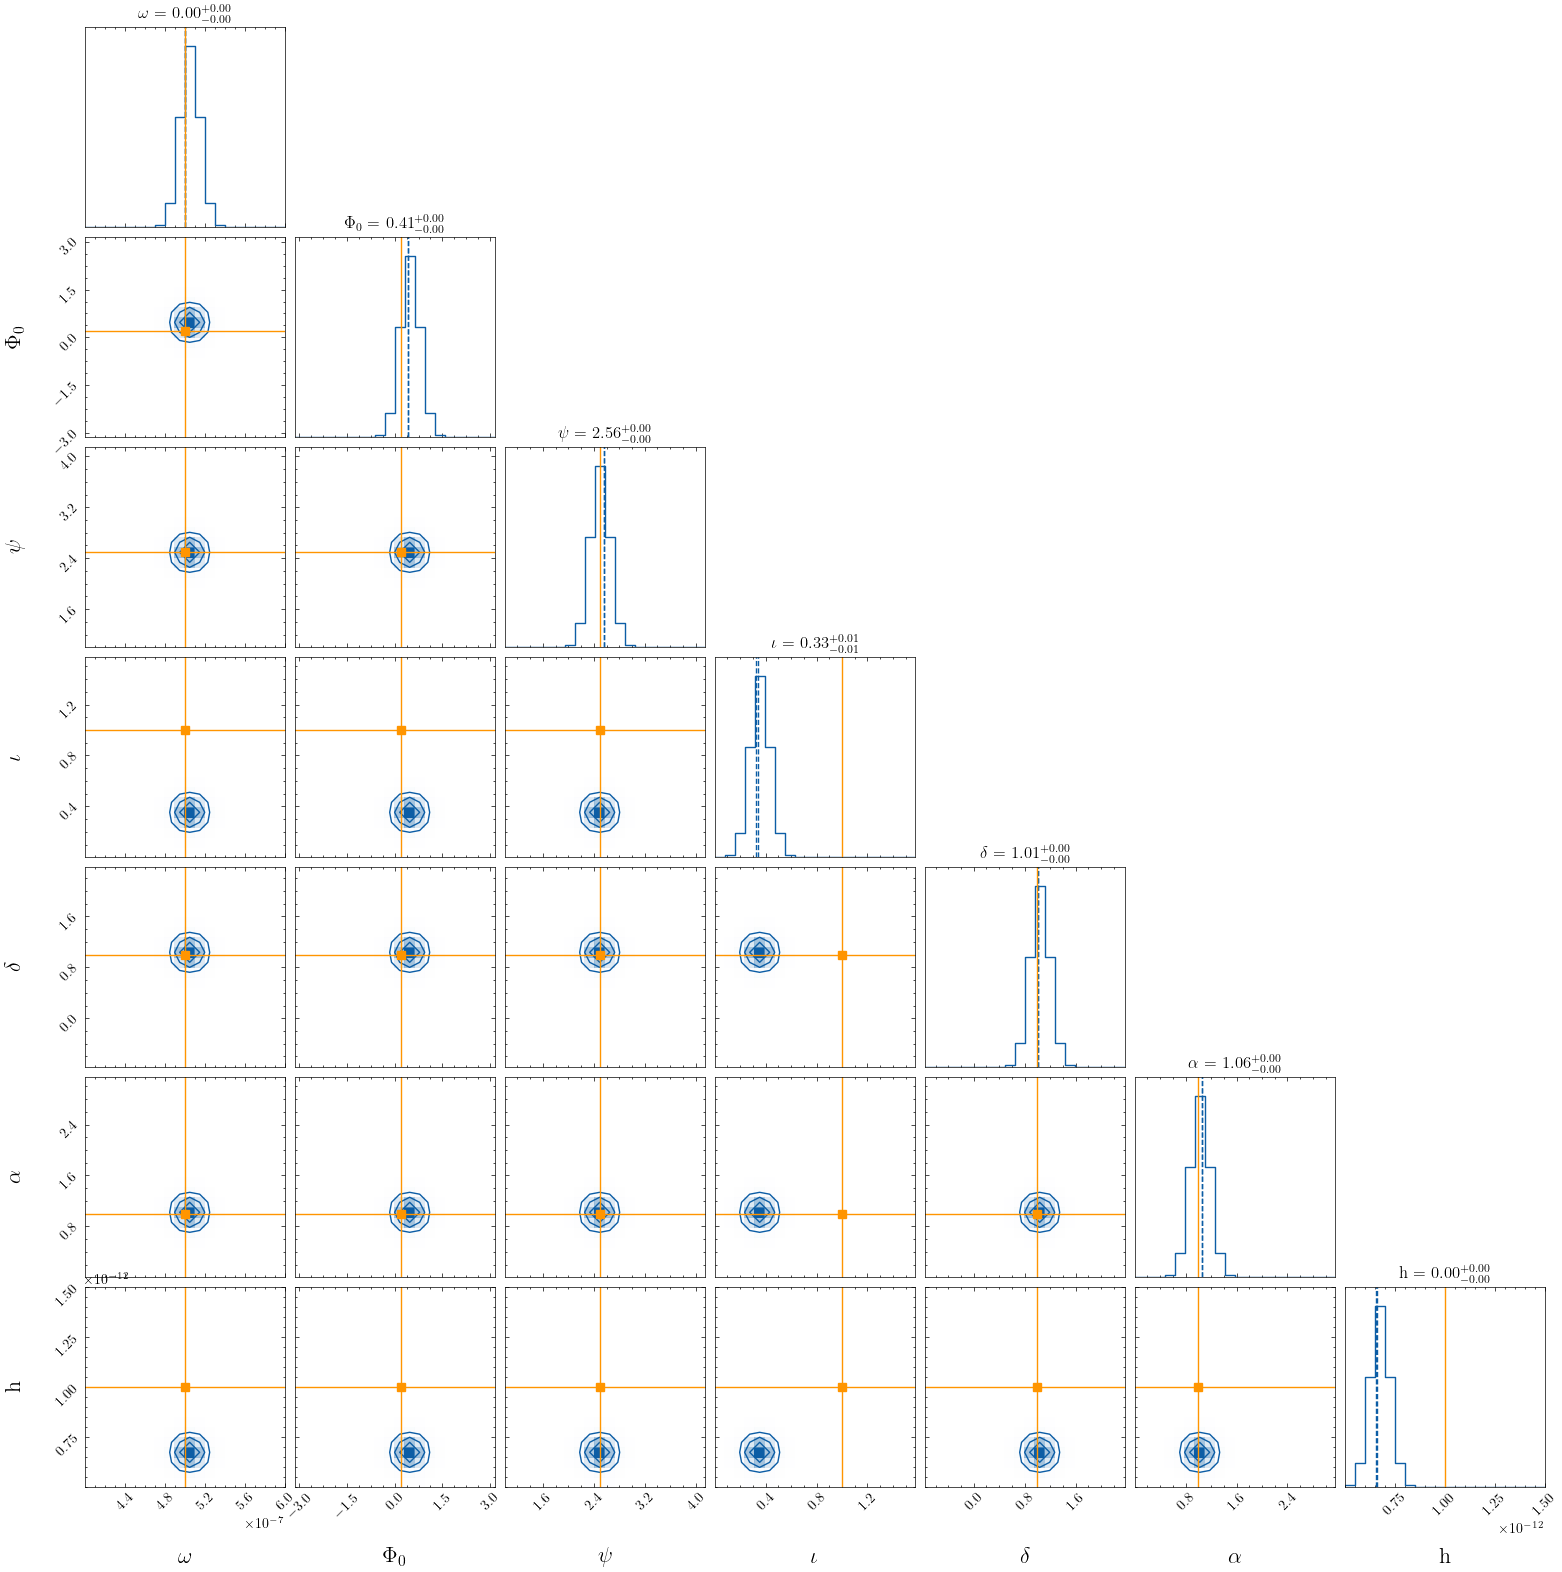

**********************************************************************
The evidence is: 132032.6085980951
Number of samples:
2150
Truths/Medians/Variances
$f_0$ 327.8470205611185 330.3213327851363 0.002247201290775743
$f_1$ 205.53069910059 205.6646370592917 0.0016344865472111168
$f_2$ 303.0909794113198 301.13033393392516 0.0007173669807420827
$f_3$ 326.600561967271 327.16944134312746 0.01673962021076515
$f_4$ 348.5592316999902 347.59917508525325 0.004590533247012912


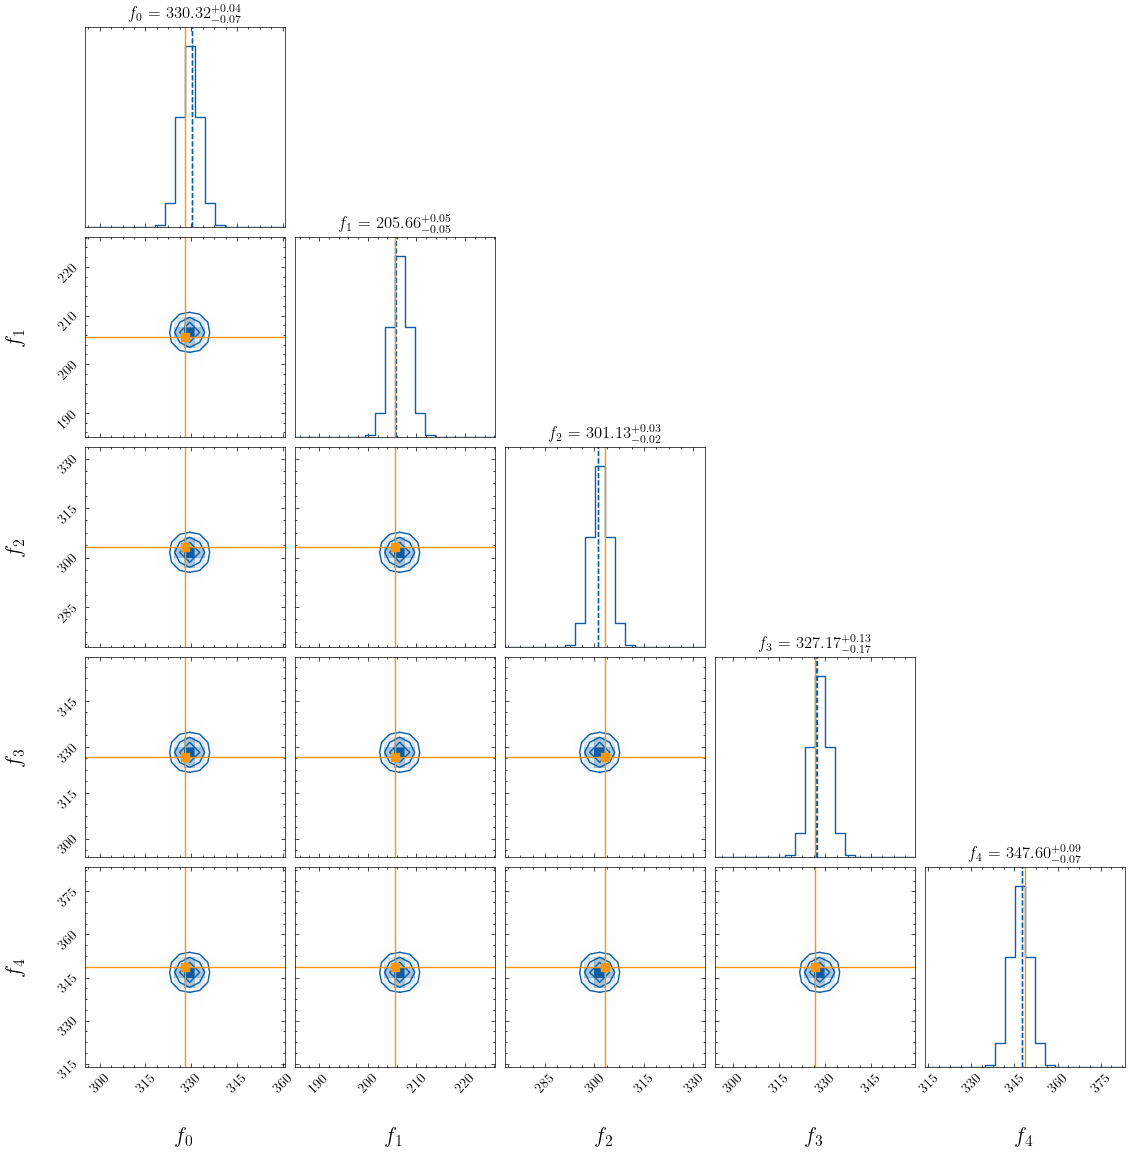

**********************************************************************
The evidence is: 132032.6085980951
Number of samples:
2150
Truths/Medians/Variances
$\dot{f}_0$ -1.227834e-15 -1.2314141601489062e-15 2.179801894300038e-39
$\dot{f}_1$ -4.297e-16 -4.3025326211952696e-16 4.0374109441083925e-40
$\dot{f}_2$ -6.4737e-16 -6.454639254925053e-16 5.90533713715041e-39
$\dot{f}_3$ -1.022991e-15 -1.0300052845049444e-15 3.299546282210326e-38
$\dot{f}_4$ -4.1895e-16 -4.198975658090037e-16 7.737376872833766e-39


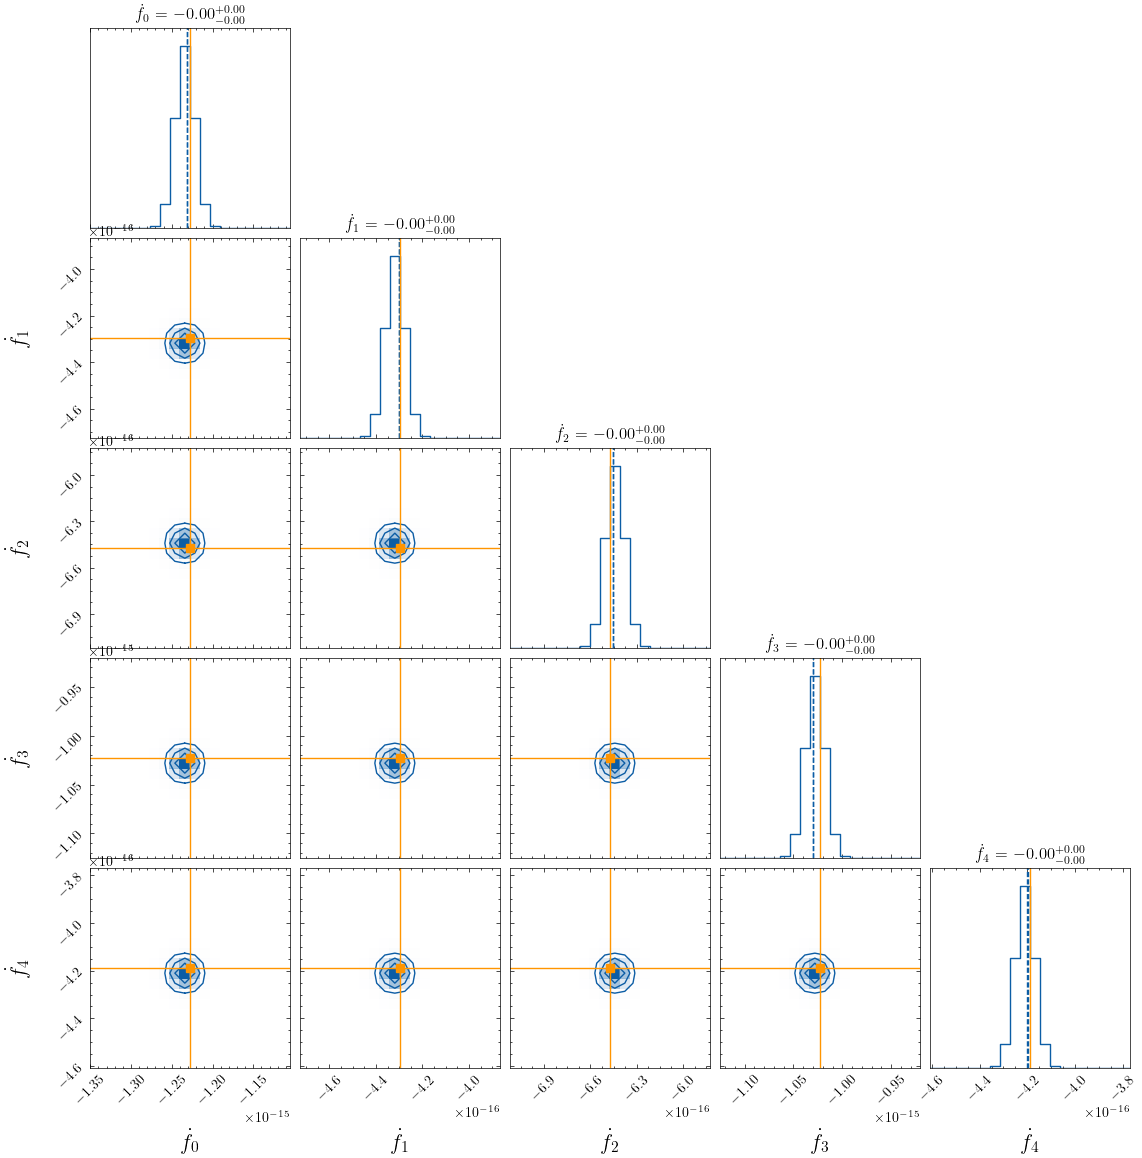

**********************************************************************
The evidence is: 132032.6085980951
Number of samples:
2150
Truths/Medians/Variances
$\sigma_p^0$ 9.769327690311607e-20 7.513349855655975e-21 3.0744005622751267e-43
$\sigma_p^1$ 3.8639377766942156e-20 1.1373630469592113e-20 2.5967465341940154e-44
$\sigma_p^2$ 9.240137714263159e-20 1.7735568100640293e-20 6.038141608063527e-44
$\sigma_p^3$ 2.6907549962490873e-20 1.7867872757056952e-20 7.116814124128967e-43
$\sigma_p^4$ 3.2590608783005556e-20 6.925568323860687e-21 8.732828517000617e-44


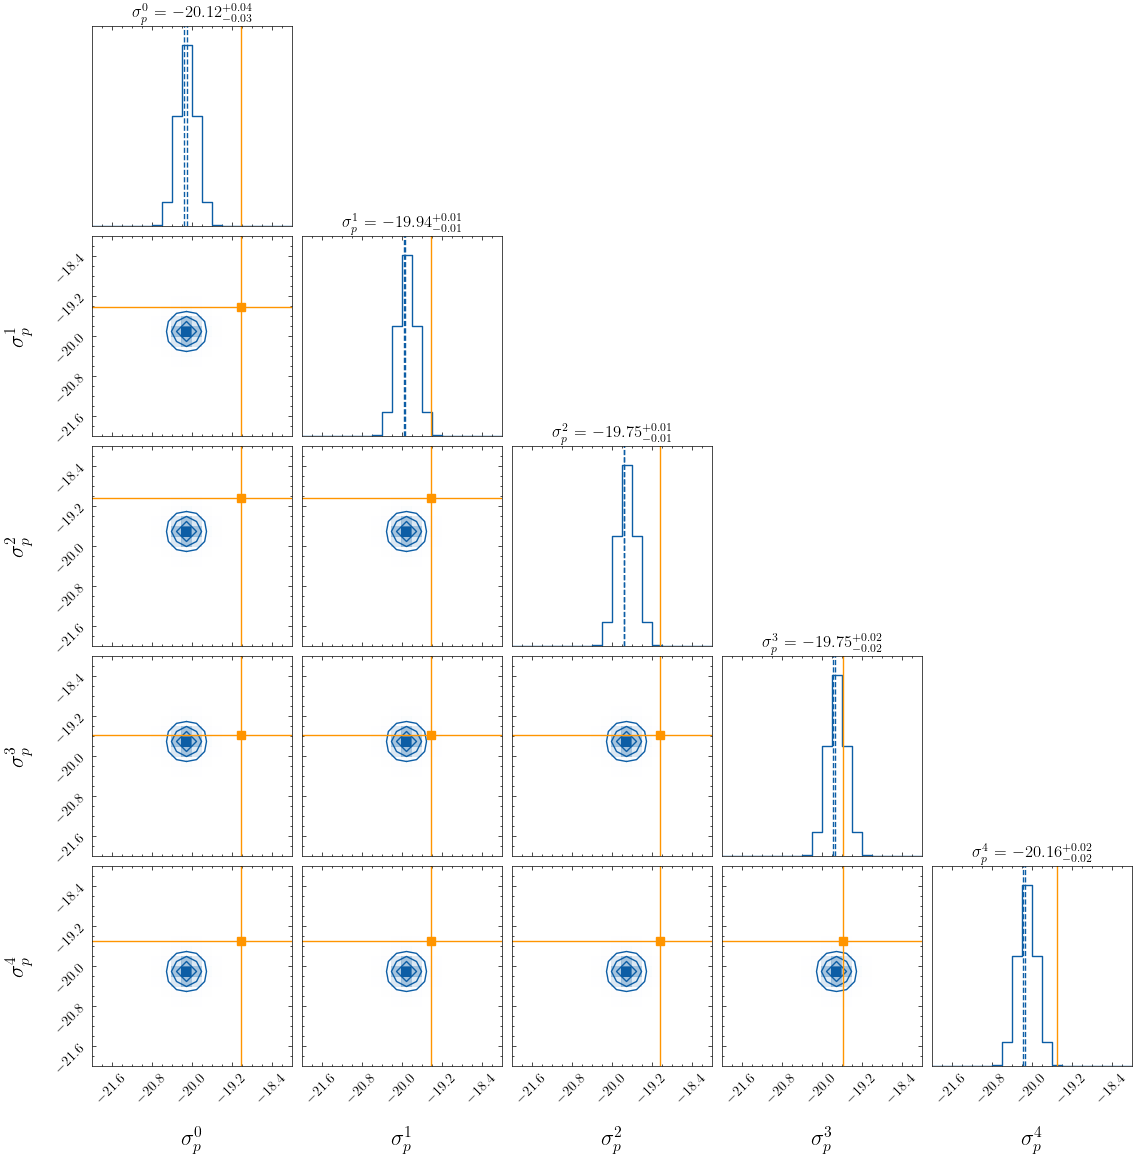

**********************************************************************


In [8]:
import numpy as np 
path = "../data/nested_sampling/psr_terms_experiment_1_result.json"
plot_all_corners(path,1234,save_id='psr_terms_expt_1')